Done yo!


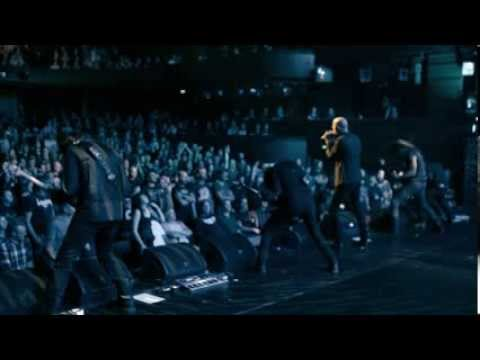

In [1]:
import re
from datetime import datetime as dt
from datetime import date as dte
import time
import calendar
import numpy as np
import random
import glob
import os
import sys
%matplotlib inline
import collections


class node:
    def __init__(self):
        self.rate=None
        self.branch=None
        self.height=None
        self.absoluteTime=None
        self.parent=None
        self.leftChild=None
        self.rightChild=None
        self.secondChild=False
        self.traits={}
        self.traitRates={}
        self.index=None
        self.childHeight=None
        self.numChildren=0
        self.N=None
        self.S=None
        self.buS=None
        self.buN=None
        ## contains references to all tips of this node
        self.leaves=[]

class leaf:
    def __init__(self):
        self.name=None
        self.numName=None
        self.index=None
        self.branch=0
        self.absoluteTime=None
        self.rate=None
        self.height=0
        self.parent=None
        self.traits={}
        self.traitRates={}
        self.N=None
        self.S=None
        self.buS=None
        self.buN=None


class tree:
    def __init__(self,obList):
        self.Objects=[]
        
        self.cur_node=node()
        self.cur_node.index='Root'
        self.cur_node.branch=0
        self.cur_node.height=0
        
        
        self.root=self.cur_node
        
        
        self.root.leftChild=node()
        
        self.root.leftChild.parent=self.root
        
        self.cur_node.treeLength=0
        
        obList.append(self.cur_node)
        self.Objects.append(self.cur_node)
        
#         obList.append(self.cur_node)
#         self.Objects.append(self.cur_node)

    def move_up(self):
        node=self.cur_node
        self.cur_node=node.parent

    def add_node(self,i,obList):
        new_node=node()
        new_node.index=i
        #obList.append(new_node)
        #self.Objects.append(new_node)
        if self.cur_node.secondChild==False:
            new_node.parent=self.cur_node
            self.cur_node.leftChild=new_node
            self.cur_node=new_node
        else:
            new_node.parent=self.cur_node
            self.cur_node.rightChild=new_node
            self.cur_node=new_node
        obList.append(self.cur_node)
        self.Objects.append(self.cur_node)
        
    def add_leaf(self,i,name,obList):
        new_leaf=leaf()
        new_leaf.index=i
        if self.cur_node.secondChild==False:
            new_leaf.name=name
            new_leaf.numName=name
            new_leaf.parent=self.cur_node
            self.cur_node.leftChild=new_leaf
            self.cur_node=new_leaf
        else:
            new_leaf.name=name
            new_leaf.numName=name
            new_leaf.parent=self.cur_node
            self.cur_node.rightChild=new_leaf
            self.cur_node=new_leaf
        obList.append(self.cur_node)
        self.Objects.append(self.cur_node)
        #print len(obList),len(self.Objects)

    def setAbsoluteTime(self,date,obList):
        #import time
        for i in self.Objects:
            #print 'current object time: %s'%(i.absoluteTime)
            print 'date: %s'%(date)
            #print 'height: %s'%(self.treeLength)
            #print 'current object height: %s'%(i.traits['height'])
            
            i.absoluteTime=date-self.treeLength+float(i.traits['height'])
            #i.absoluteTime=date-i.traits['height']
            #print 'new object time: %s'%(i.absoluteTime)
            #time.sleep(0.2)

    def renameTips(self,tipList):
        for i in self.Objects:
            if isinstance(i,leaf)==True:
                i.name=tipList[index(column(tipList,0),str(i.name))[0]][1]


    def randomNode(self):
        nodeList=[]
        for i in object_list:
            if isinstance(i,node):
                nodeList.append(i)

        return nodeList[random.randint(0,len(nodeList)-1)]


    def randomTip(self):
        tipList=[]
        for i in object_list:
            if isinstance(i,leaf):
                tipList.append(i)

        return tipList[random.randint(0,len(tipList)-1)]
      

    def collectObjects(self,startNode):
        cur_node=startNode
        seen=[]
        root=False
        encounteredObjects=[]

        if isinstance(startNode,leaf)==True:
            root=True
        
        while root==False:
            if isinstance(cur_node,node):
                while cur_node.leftChild.index and cur_node.rightChild.index in seen:
                    if cur_node.parent==startNode.parent:
                        root=True
                        break
                    else:
                        cur_node=cur_node.parent

                if cur_node.leftChild.index in seen or cur_node.index in seen:
                    cur_node=cur_node.rightChild
                else:
                    seen.append(cur_node.index)
                    encounteredObjects.append(cur_node)
                    cur_node=cur_node.leftChild

            if isinstance(cur_node,leaf):
                encounteredObjects.append(cur_node)
                seen.append(cur_node.index)
                cur_node=cur_node.parent

        return encounteredObjects     

    def TMRCA(self,objectA,objectB):
        cur_nodeA=objectA
        cur_nodeB=objectB
        dictA={}
        dictB={}

        while cur_nodeA.parent!=None:
            cur_nodeA=cur_nodeA.parent
            dictA[cur_nodeA.index]=cur_nodeA

        while cur_nodeB.parent!=None:
            cur_nodeB=cur_nodeB.parent
            dictB[cur_nodeB.index]=cur_nodeB
            if dictA.has_key(cur_nodeB.index):
                key=cur_nodeB.index
                break

        return dictA[key]

    def timeToTMRCA(self,tip1,tip2):
        cur_nodeA=tip1
        cur_nodeB=tip2
        dictA={}
        dictB={}

        while cur_nodeA.parent!=None:
            cur_nodeA=cur_nodeA.parent
            dictA[cur_nodeA.index]=cur_nodeA

        while cur_nodeB.parent!=None:
            cur_nodeB=cur_nodeB.parent
            dictB[cur_nodeB.index]=cur_nodeB
            if dictA.has_key(cur_nodeB.index):
                key=cur_nodeB.index
                break

        intersect=dictA[key]

        return -2*float(intersect.absoluteTime)+float(tip1.absoluteTime)+float(tip2.absoluteTime)

    def SubTreeTraversal(self,startNode):
        cur_node=startNode
        seen=[]
        collected=[]
        root=False
        #print 'starting subtreetraversal from:',startNode.index
        while root==False:
            #time.sleep(0.05)
            if isinstance(cur_node,node):
                #print 'Encountered node %s with %s/%s children %s,'%(cur_node.index,len(cur_node.leaves),cur_node.numChildren,cur_node.leaves)
                #time.sleep(0.05)
                while cur_node.leftChild.index in seen and cur_node.rightChild.index in seen:
                    #print 'all seen',
                    if cur_node.index==startNode.index:
                        #pass
#                         #print 'ROOT'
                        #print 'breaking at',cur_node.index
                        root=True
                        break
                    else:
                        #print 'descending from',cur_node.index
                        cur_node=cur_node.parent

                if cur_node.leftChild.index in seen:
                    #print 'left and current seen, going right to',cur_node.rightChild.index
                    cur_node=cur_node.rightChild
                else:
                    #print 'left not seen, going left'
                    seen.append(cur_node.index)
                    cur_node=cur_node.leftChild
                    
            if isinstance(cur_node,leaf):
                #print 'Encountered leaf %s %s (%s), parent: %s'%(cur_node.index,cur_node.numName,cur_node.name,cur_node.parent.index)
                seen.append(cur_node.index)
                if cur_node not in collected:
                    collected.append(cur_node)
                cur_node=cur_node.parent

        assert(len(collected)==len(startNode.leaves)),'number of collected leaves: %s number of leaves start node should have: %s'%(len(collected),len(startNode.leaves))      
        return collected

    def sortBranches(self):
        for q in self.Objects[1:]:
            ## nodes are targeted for sorting
            if isinstance(q,node)==True:
                if isinstance(q.leftChild,leaf)==True and isinstance(q.rightChild,leaf)==True:
                    ## both are leaf
                    pass
                elif isinstance(q.leftChild,leaf)==True and isinstance(q.rightChild,node)==True:
                    ## left is leaf, right is node
                    pass
                elif isinstance(q.leftChild,node)==True and isinstance(q.rightChild,leaf)==True:
                    ## left is node, right is leaf
                    newLeft=q.rightChild
                    q.rightChild=q.leftChild
                    q.leftChild=newLeft
                elif isinstance(q.leftChild,node)==True and isinstance(q.rightChild,node)==True:
                    ## both are node
                    
                    ## if left has more children than right, make it right
                    if len(q.leftChild.leaves)>len(q.rightChild.leaves):
                        newLeft=q.rightChild
                        q.rightChild=q.leftChild
                        q.leftChild=newLeft
                    ## if right has more children than left, leave as is
                    elif len(q.leftChild.leaves)<len(q.rightChild.leaves):
                        pass
                    else:
                        if q.leftChild.childHeight>q.rightChild.childHeight:
                            ## left node is higher
                            newLeft=q.rightChild
                            q.rightChild=q.leftChild
                            q.leftChild=newLeft
                        elif q.leftChild.childHeight<q.rightChild.childHeight:
                            ## right node is higher
                            pass
                        else:
                            print 'both nodes have the same number of children and height',q.index,q.traits['height'],len(q.rightChild.leaves),q.rightChild.numChildren,q.leftChild.numChildren,q.leftChild.childHeight,q.rightChild.childHeight
                    
    def traverse_tree(self,fromIndex):
        cur_node=None
        if fromIndex==0:
            cur_node=self.root
        elif fromIndex==1:
            cur_node=self.root.leftChild.leftChild
        else:
            print 1/float(0)

        numChildren=0
        seen=[]
        highestTip=0
        maxHeight=0
        #highestTip=cur_node.branch
        #global maxHeight
        height=float(0)
        #height=cur_node.branch
        root=False
        storeNode=None
        while root==False:
            #time.sleep(0.05)

            if isinstance(cur_node,node):
                #print 'Encountered node %s,'%(cur_node.index)
                while cur_node.leftChild.index in seen and cur_node.rightChild.index in seen:
                    #print 'both children seen, going back.'
                    if cur_node.childHeight <= highestTip:
                        cur_node.childHeight = highestTip
                    elif cur_node.childHeight > highestTip:
                        highestTip = cur_node.childHeight

                    if cur_node.parent.index=='Root':
                        root=True
                        break
                    else:
                        cur_node.parent.numChildren+=cur_node.numChildren
                        cur_node.parent.leaves+=cur_node.leaves
                        cur_node.parent.leaves=unique(cur_node.parent.leaves)
                        cur_node.parent.leaves=sorted(cur_node.parent.leaves)
                        height-=float(cur_node.traits['length'])
                        #print 'transmitting children, parent now has: %s children (added %s)'%(len(cur_node.parent.leaves),len(cur_node.leaves))
                        cur_node=cur_node.parent

#                     if cur_node.index=='Root':
#                         root=True
#                         break


                if cur_node.leftChild.index in seen or cur_node.index in seen:
                    #print 'left child/current node seen, going right.'
                    height+=float(cur_node.rightChild.traits['length'])
                    cur_node.childHeight=highestTip
                    highestTip=0
                    cur_node=cur_node.rightChild
                else:
                    #print 'new child, going left.'
                    height+=float(cur_node.leftChild.traits['length'])
                    seen.append(cur_node.index)
                    cur_node=cur_node.leftChild
                
                
            elif isinstance(cur_node,leaf):
                #print 'Encountered leaf %s, parent: %s'%(cur_node.name,id(cur_node.parent))
                cur_node.parent.numChildren+=1
                #print 'assigning leaf to parent\'s leaves'
                cur_node.parent.leaves.append(cur_node.name)
                cur_node.parent.leaves=sorted(cur_node.parent.leaves)
                #print 'parent %s has %s leaves'%(cur_node.parent.index,len(cur_node.parent.leaves))
                seen.append(cur_node.index)
                highestTip=float(height)
                if maxHeight<=float(cur_node.traits['height']):
                    maxHeight=float(cur_node.traits['height'])
                height-=float(cur_node.traits['length'])
                cur_node=cur_node.parent
                

        self.treeLength=float(maxHeight)
        #assert(len(unique(seen))==(len(self.root.leaves)*2)-1),'number seen: %s number parsed: %s'%(len(unique(seen)),len(self.root.leaves))
        #print 'Highest tip found:',self.treeLength

    def allTMRCAs(self,tipList,obList):
        #import time
        allTMRCA={}
        for x in range(0,len(tipList)):
            #print tipList[x],
            #time.sleep(0.2)
            allTMRCA[tipList[x]]={}
            for k in range(0,len(tipList)):
                #print tipList[k]
                allTMRCA[tipList[x]][tipList[k]]=0
                #time.sleep(0.05)
        
        for y in obList:
            
            if isinstance(y,node):
                #print len(y.leaves),y.absoluteTime,id(y)
                #print len(y.leaves),y.absoluteTime
                for k in range(0,len(y.leaves)-1):
                    for x in range(k+1,len(y.leaves)):
                        #print y.leaves[k],y.leaves[x],y.absoluteTime
                        if allTMRCA[y.leaves[k]][y.leaves[x]]<=y.absoluteTime:
                            #print 'setting tmrca of %s and %s from %s to %s'%(y.leaves[k],y.leaves[x],allTMRCA[y.leaves[k]][y.leaves[x]],y.absoluteTime)
                            allTMRCA[y.leaves[k]][y.leaves[x]]=y.absoluteTime
                            allTMRCA[y.leaves[x]][y.leaves[k]]=y.absoluteTime
                            #time.sleep(0.05)
                        else:
                            pass
                            #print '%s and %s have TMRCA@ %s'%(y.leaves[k],y.leaves[x],allTMRCA[y.leaves[k]][y.leaves[x]])
                            #time.sleep(0.05)
        
        return allTMRCA

def overlap(a,b):
    """
    Return the elements shared by two lists in the following format:
    [overlap],[list 1 remainder],[list 2 remainder]
    """
    a_multiset = collections.Counter(a)
    b_multiset = collections.Counter(b)

    overlap = list((a_multiset & b_multiset).elements())
    a_remainder = list((a_multiset - b_multiset).elements())
    b_remainder = list((b_multiset - a_multiset).elements())

    return overlap, a_remainder, b_remainder

def unique(o, idfun=repr):
    seen = {}
    return [seen.setdefault(idfun(e),e) for e in o if idfun(e) not in seen]

def column(data,col):
    return [row [col] for row in data]

def index(data,item):
    return [i for i,x in enumerate(data) if x == item]

def makeSliceList(slices,start,end,bins):
    for i in np.arange(start,end,1/float(bins)):
        slices.append([i])

def findTip(some_list):
    global tips
    tipsChosen=['B/Tehran/80/02_2002']
    #tipsChosen=['B/Tehran/80/02_2002','B/Iowa/03/2002_2002-03-19','B/Vietnam/92/2011_2011-03-22']
    returnList=[]
    for i in some_list:
        if isinstance(i,leaf)==True:
            for j in tipsChosen:
                tipIndex=index(column(tips,1),j)[0]
                if int(i.name)==int(tips[tipIndex][0]):
                    returnList.append(i)
    return returnList

def toDecimalYear(d):
    date_y = d.split('-')[0]
    date_m = d.split('-')[1]
    if d.count('-')==2:
        date_d = d.split('-')[2]
    else:
        date_d = '15'
    d = (int(date_y), int(date_m), int(date_d))
    d = dte(*d)
    
    year_start = dte(d.year, 1, 1).toordinal()
    next_year_start = dte(d.year+1, 1, 1).toordinal()
    frac = float(d.toordinal()+0.5 - year_start)/(next_year_start - year_start)
    return d.year + frac

def mostRecent(some_list):
    full=[]
    month=[]
    year=[]
    dates=[]
    parsedNames=[]
    setYear=2013
    ## enclose the bit containing the date in brackets
    ## date should be in format yyyy-mm-dd
    dateRegex='[A-Za-z0-9\_]+\/[A-Za-z\/\-\_\.0-9]+\/[0-9\.A-Z\-a-z]+\_([0-9\.]+)\_[A-Z\-a-z]+\_[A-Za-z]+\_[A-Z0-9]+'

    #'B/Anhui-Luyang/1142/2011_2011.336_China_AsiaEast_VIC87'
    
    #dateRegex='[A-Z]\/[A-Za-z\/\-\_\.0-9]+\/([0-9\.A-Za-z]+)'
    
    #dateRegex='\'[A-Za-z\-\_\|\/|.0-9]+\_([0-9\-]+)\'$' ## global swine summer 2015
    
    #dateRegex='\'[A-Za-z\-\_\|\/|.0-9]+\|([0-9\-]+)\'$' ## global swine in paper
    
    
    dates=[]
    for i in some_list:
        #print i
        C=re.search('%s'%(dateRegex),i)
        if C is not None:
            if "-" in C.group(1):
                decdate = toDecimalYear(C.group(1))
            else:
                decdate = C.group(1)
            #print C.group(),C.group(1)
            #dates.append(float(C.group(1)))
            dates.append(float(decdate))
    return max(dates)


def mostOld(some_list):
    full=[]
    month=[]
    year=[]
    dates=[]
    parsedNames=[]
    setYear=2013
    ## enclose the bit containing the date in brackets
    ## date should be in format yyyy-mm-dd
    dateRegex='[A-Za-z0-9\_]+\/[A-Za-z\/\-\_\.0-9]+\/[0-9\.A-Z\-a-z]+\_([0-9\.]+)\_[A-Z\-a-z]+\_[A-Za-z]+\_[A-Z0-9]+'

    #'B/Anhui-Luyang/1142/2011_2011.336_China_AsiaEast_VIC87'
    
    #dateRegex='[A-Z]\/[A-Za-z\/\-\_\.0-9]+\/([0-9\.A-Za-z]+)'
    
    #dateRegex='\'[A-Za-z\-\_\|\/|.0-9]+\_([0-9\-]+)\'$' ## global swine summer 2015
    
    #dateRegex='\'[A-Za-z\-\_\|\/|.0-9]+\|([0-9\-]+)\'$' ## global swine in eLife paper
    
    
    dates=[]
    for i in some_list:
        #print i
        C=re.search('%s'%(dateRegex),i)
        if C is not None:
            if "-" in C.group(1):
                decdate = toDecimalYear(C.group(1))
            else:
                decdate = C.group(1)
            #print C.group(),C.group(1)
            #dates.append(float(C.group(1)))
            dates.append(float(decdate))
    return min(dates)


def make_tree(data,ll,obList):
    import time
    """
    data is tree string
    ll is an instance of a tree object
    """
    global i
    global trait_list
    global trait_names
    global partition_name
    stored_i=None
    ministore=None
    while i < len(data):
        assert (stored_i != i),'\nTree string unparseable\nStopped at %s\nstring region looks like this: %s'%(data[i],data[i:i+20])
        stored_i=i
        
        cerberus=re.match('\[&',data[i:i+3])
        if cerberus is not None:
            items=[]
            i+=len(cerberus.group())
            noEnd=True
            while noEnd==True:
                assert (ministore!= i),'stuck at %s'%(data[i:i+3500])
                ministore=i
                # [A-Za-z0-9\.\"\_\-\=\%]+
                # [A-Za-z0-9\.\"\_\-\%]+\=
                # \{[0-9\,\"A-Za-z\-\.]+\})(,|\])
                minicerberus=re.match('([A-Za-z0-9\.\"\_\-\=\%]+|[A-Za-z0-9\.\"\_\-\%]+\=\{[0-9\,\"A-Za-z\-\.]+\})(,|\])',data[i:i+3500])
                if minicerberus is not None:
                    items.append(minicerberus.group()[:-1])
                    ll.cur_node.traits[items[-1].split('=')[0]]=items[-1].split('=')[1].strip('"')
                    #print items[-1].split('=')[0],items[-1].split('=')[1].strip('"')
                    if minicerberus.group(2)==']':
                        noEnd=False
                        i+=len(minicerberus.group())
                        break
                    elif minicerberus.group(2)==',':
                        cerberus=re.match('(\'[A-Za-z\-\_\|\/|.0-9]+\')\[',data[i:i+150])
                        if cerberus is not None:
                            print 'found unusual tip'
                            ll.move_up()
                            ll.cur_node.secondChild=True
                            ll.add_leaf(i,cerberus.group(1),obList)
                            i+=len(cerberus.group(1))
                        else:
                            i+=len(minicerberus.group())

        microcerberus=re.match('\:[0-9\.\-E]+',data[i:i+50])
        if microcerberus is not None:
            i+=len(microcerberus.group())

        if data[i] == '(':
            ll.add_node(i,obList)
            i+=1
            cerberus=re.match('(\'[A-Za-z\-\_\|\/|.0-9]+\')\[',data[i:i+150])
            if cerberus is not None:
                ll.add_leaf(i,cerberus.group(1),obList)
                #print cerberus.group(1)
                i+=len(cerberus.group(1))
            elif data[i]=='(':
                make_tree(data,ll,obList)
            else:
                print 'node followed by neither node nor leaf'
                
        if data[i] == ',':
            i+=1
            ll.move_up()
            ll.cur_node.secondChild=True
            cerberus=re.match('(\'[A-Za-z\-\_\|\/|.0-9]+\')\[',data[i:i+150])
            if cerberus is not None:
                ll.add_leaf(i,cerberus.group(1),obList)
                i+=len(cerberus.group(1))

        if data[i] == ')':
            ll.move_up()
            i+=1

        if data[i] == ';':
            leafCounter=0
            nodeCounter=0
            for lf in obList:
                if isinstance(lf,leaf):
                    leafCounter+=1
                else:
                    nodeCounter+=1
            #print len(obList),len(ll.Objects),(leafCounter*2)-1,leafCounter
            #assert ((leafCounter*2)-1 == len(obList)),'\nTree string has been parsed incorrectly:\nN tips: %s\nN nodes: %s\nobjects found in the tree string: %s'%(leafCounter,nodeCounter,len(obList))
            break
print 'Done yo!'

from IPython.display import YouTubeVideo
YouTubeVideo("i5GhFL0OWq8")

Yam_mds.308.FigTreeFormatClades.mcc.tre
308 308 308
2013.051
1987.0
616
308 308 308


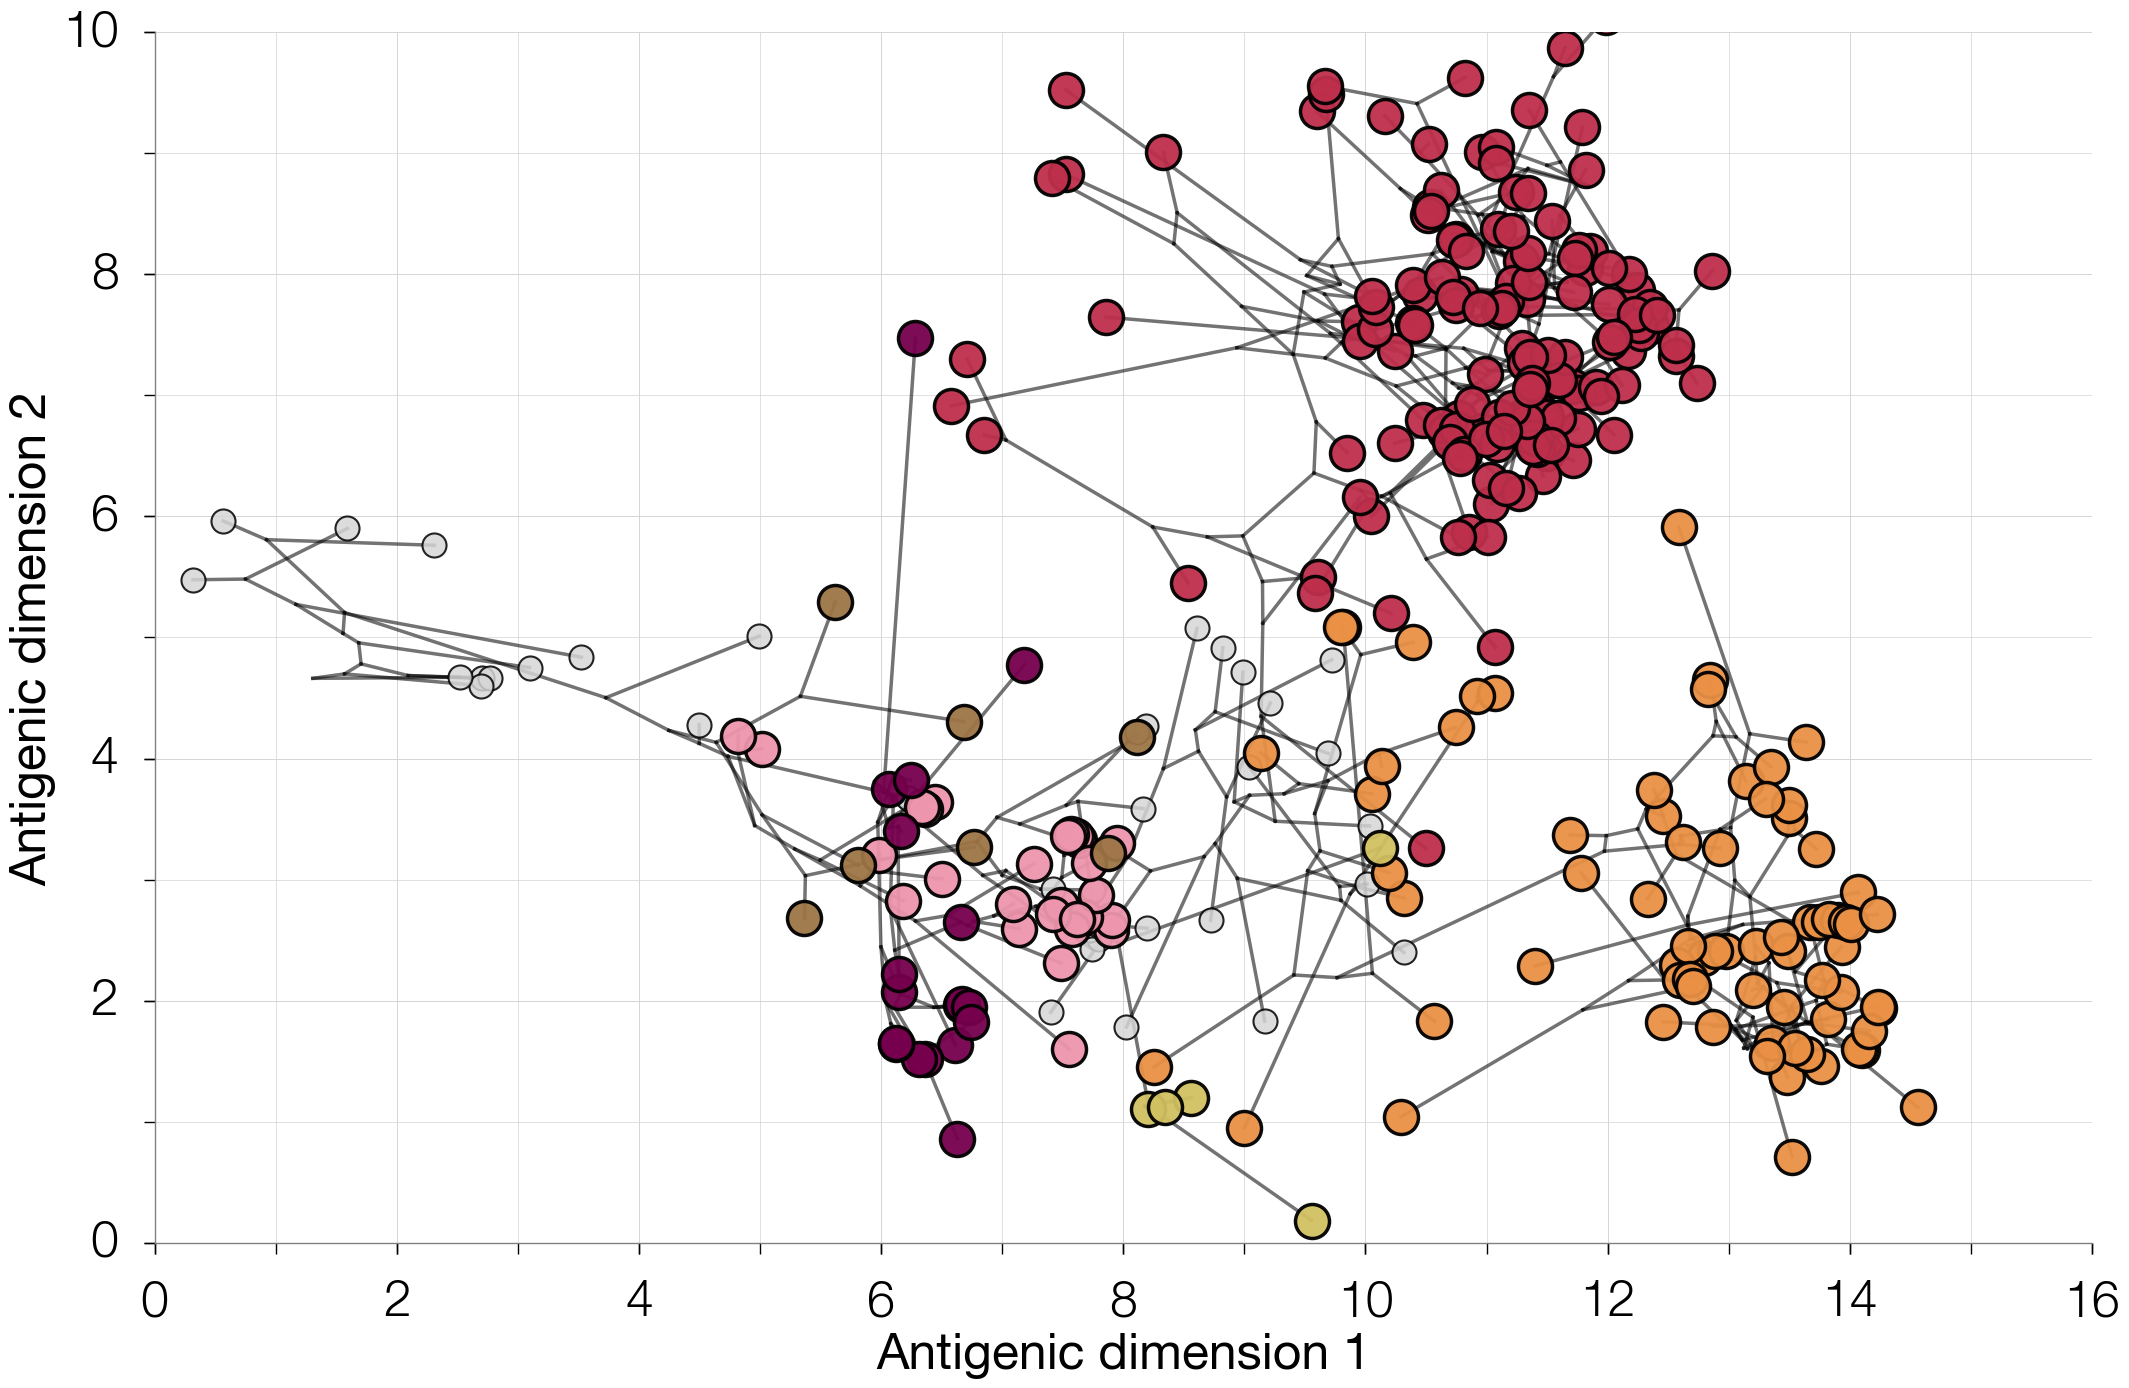

In [3]:
## FluB noeffects
#path='/Users/pl6/Desktop/Projects/2-FluB/2-antigenic_analysis_2016-08-05/yam/3-bmds/mds_drift_noeffects_tree/chain1/'
#path='/Users/pl6/Desktop/Projects/2-FluB/2-antigenic_analysis_2016-08-05/vic/3-bmds/mds_drift_noeffects_tree/chain3/'

## FluB effects
path='/Users/pl6/Desktop/Projects/2-FluB/2-antigenic_analysis_2016-08-05/yam/3-bmds/mds_drift_effects_tree/chain2/'
#path='/Users/pl6/Desktop/Projects/2-FluB/2-antigenic_analysis_2016-08-05/vic/3-bmds/mds_drift_effects_tree/chain1/'

#fileSuf='Format.mcc.tre'
fileSuf='FormatClades.mcc.tre'
typeface = 'HelveticaNeue-Light'

import matplotlib as mpl
#mpl.use('Qt4Agg')
from matplotlib.ticker import MultipleLocator
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'
#mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=18
mpl.rcParams['font.weight'] = 'light'
#mpl.rcParams['animation.ffmpeg_path'] = '/Users/pl6/homebrew/bin/ffmpeg'

global i
global tips
global object_list

for filename in glob.glob(os.path.join(path,'*%s'%(fileSuf))):
    print filename.split('/')[-1]
    tipFlag=False
    i=0
    object_list=[]
    tips=[]
    tipNum=0
    tree1=tree(object_list)
    
    ## Reading tree file
    for line in open(filename,'r'):
        l=line.strip('\n')
        #print l
        
        cerberus=re.search('dimensions ntax=([0-9]+);',l.lower())
        if cerberus is not None:
            tipNum=int(cerberus.group(1))
        
        
        cerberus=re.search('tree TREE([0-9]+) = \[&R\] ',l)
        if cerberus is not None:
            make_tree(l[len(cerberus.group())+1:],tree1,object_list)
        
            
        if tipFlag==True:
            cerberus=re.search('([A-Za-z\-\_\|\/\.\'0-9 ]+)',l)
            #cerberus=re.search('([A-Za-z\-\_\/\.\'0-9 ]+)',l)
            if cerberus is not None:
                tips.append(str(cerberus.group(1)))
            elif ';' not in l:
                print 'tip not captured by regex:',l.replace('\t','')
                
        if 'taxlabels' in l.lower():
            tipFlag=True
        if ';' in l:
            tipFlag=False
    
    
    #print tips
    tips1=list(tips)
    object_list1=list(object_list)
    
    #print [x.traits for x in object_list[:2]]
    
    tree1.traverse_tree(1)

    leafcounter=0
    nodecounter=0
    for k in tree1.Objects:
        if isinstance(k,leaf):
            leafcounter+=1
        else:
            nodecounter+=1
            #print k.name,index(column(tips1,0),k.numName),
    print leafcounter,len(tips),nodecounter
    #tree1.renameTips(tips1)

    calTipDate=mostRecent(tips)
    oldTipDate=mostOld(tips)
    print calTipDate
    print oldTipDate
    print len(tree1.Objects)
    
    
    #print tree1.Objects[0].leftChild,len(tree1.Objects[0].leftChild.leaves), tree1.Objects[0].rightChild,len(tree1.Objects[0].rightChild.leaves)
    for k in tree1.Objects[2:]:
        k.absoluteTime=calTipDate-float(k.traits['height'])
        k.parent.absoluteTime=calTipDate-float(k.parent.traits['height'])
    
    check=[]
    for k in tree1.Objects:
        if isinstance(k,node):
            check.append(len(k.leaves))
        
    #assert min(check)!=0
    
    tree1.sortBranches() 
    
    #print tree1.Objects[0].leaves
    #print len(tree1.Objects[23].leaves)
    
    #ind=0
    #print 'node:',len(tree1.Objects[ind].leaves),tree1.Objects[ind].numChildren,tree1.Objects[ind].leaves
    #print '\ntraversal:',len(tree1.SubTreeTraversal(tree1.Objects[ind])),[x.numName for x in tree1.SubTreeTraversal(tree1.Objects[ind])]
    
    #order=[x.numName for x in tree1.SubTreeTraversal(tree1.Objects[0])]
    
    #print tree1.Objects[0].parent==tree1.Objects[3].parent
    #print tree1.Objects[0].parent.index
    #print tree1.Objects[0].leftChild.index,tree1.Objects[0].leftChild.name
    #print tree1.Objects[0].index,tree1.Objects[1].index,tree1.Objects[2].index
    #print len(tree1.SubTreeTraversal(tree1.Objects[1]))
    
    #### Draw 3D trees
    #%matplotlib tk
    %matplotlib inline
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(25,25))
    #ax = fig.add_subplot(111, projection='3d')
    fig, ax = plt.subplots(figsize=(25,25))
    ax.patch.set_facecolor('none')
    
    trait1='antigenic1'
    #trait1='antigenic2'
    trait2='antigenic2'
    #trait2='height'
    trait3='antigenic3'
    
    leavesX=[]
    leavesY=[]
    leavesZ=[]
    
    nodesX=[]
    nodesY=[]
    nodesZ=[]
    

    for k in tree1.Objects[2:]:
        if fileSuf=='Format.mcc.tre' or fileSuf=='FormatClades.mcc.tre':
            if 'cluster' not in k.traits:
                #clus='X'
                #clus='000000'
                clus='d6d6d6'
                #print "%s: OOPS" % k
            else:
                clus=k.traits['cluster']
                #print clus
        else:
            #clus='X'
            clus='000000'
        
        ##standardising increments for plotting in same range
        #VIC
        #std_x = 0.9
        #std_y = 2.1
        
        ##YAM
        std_x = 2.5
        std_y = 4.5
        
        #VIC-noeffects
        #std_x = 1
        #std_y = 2
        
        ##YAM-noeffects
        #std_x = 1.5
        #std_y = 2.5
        
        ## 2D with time
        #x=float(k.absoluteTime)
        x=float(k.traits[trait1]) + std_x
        y=float(k.traits[trait2]) + std_y
        z=-float(k.traits[trait2])
        
        #xp=float(k.parent.absoluteTime)
        xp=float(k.parent.traits[trait1]) + std_x
        yp=float(k.parent.traits[trait2]) + std_y
        zp=-float(k.parent.traits[trait2])
        
        ## 3D
        #x=float(k.traits[trait1])
        #y=float(k.traits[trait2])
        #z=-float(k.traits[trait3])
    
        #xp=float(k.parent.traits[trait1])
        #yp=float(k.parent.traits[trait2])
        #zp=-float(k.parent.traits[trait3])
        
        ax.plot([x,xp],[y,yp],color='black',lw=2.5,alpha=0.55, zorder=1)

        
        if isinstance(k,leaf):
            leavesX.append(x)
            leavesY.append(y)
            leavesZ.append(z)
            
            #ax.plot([x,x],[y,y],[z,0],color='k',lw=0.6,ls=':',alpha=0.8)
            #pl=ax.scatter(x,y,z,s=50,facecolor='w',edgecolor='k')
            #ax.plot([x,x],[y,y],[z,0],color='k',lw=0.6,ls='--')
            #if "VACC" in k.name:
               # ax.text(x,y,k.name, size=18)
            #if "Hong" in k.name and "2009" in k.name and clus=="2481ba":
                #ax.text(x,y,z,k.name[:], size=18)
                #ax.scatter(x,y,s=500,c='black',edgecolor='black',alpha=0.8)

            #elif "VACC" in k.name:
                #ax.scatter(x,y,s=500,c=leavesZ,cmap=cm.hsv,edgecolor='black',alpha=0.8)
            #clus=k.traits['cluster']
            
            ##Table of virus map coordinates
            #print "%s\t%s\t%s\t%s" % (k.name, x, y, z)
            
            #print calTipDate
            #print oldTipDate
            ## added absolute for the numbers really close to 0 but negative?
            #a_level = abs((float(k.absoluteTime)-oldTipDate)/(calTipDate-oldTipDate))
            #a_level = abs((float(k.absoluteTime)-1880)/(2050-1880))
            
             ## YAM clade colours
            if clus=='WI10':
                cluscol='#be2f4b'
            elif clus=='MA12':
                cluscol='#EA9145'
            elif clus=='FL06':
                #cluscol='#7571B4'
                cluscol='#D2C161'
            elif clus=='SH02':
                #cluscol='#444444'
                cluscol='#76004D'
            elif clus=='HA94':
                #cluscol='#006400'
                cluscol='#9D7546'
            elif clus=='YA98':
                cluscol='#EE96AD'
            else:
                cluscol='#d6d6d6'
            
#             ## YAM clade colours - REDS
#             if clus=='WI10':
#                 cluscol='#bd0026'
#             elif clus=='MA12':
#                 cluscol='#f03b20'
#             elif clus=='FL06':
#                 cluscol='#fd8d3c'
#             elif clus=='SH02':
#                 cluscol='#feb24c'
#             elif clus=='YA98':
#                 cluscol='#fed976'
#             elif clus=='HA94':
#                 cluscol='#ffffb2'
#             else:
#                 cluscol='other'
            
             ## VIC clade colours
#             if clus=='BR08':
#                 cluscol='#32659f'
#             elif clus=='OD10':
#                 cluscol='#92c4de'
#             elif clus=='MA04':
#                 cluscol='#89A24C'
#             elif clus=='CA11':
#                 #cluscol='#D2C161'
#                 cluscol='#7571B4'
#             elif clus=='HK01':
#                 cluscol='#CAB2D6'
#             else:
#                 cluscol='#d6d6d6'

            ## VIC clade colours - BLUES
#            if clus=='BR08':
#                cluscol='#0868ac'
#            elif clus=='OD10':
#                cluscol='#43a2ca'
#            elif clus=='MA04':
#                cluscol='#7bccc4'
#            elif clus=='CA11':
#                cluscol='#bae4bc'
#            elif clus=='HK01':
#                cluscol='#f0f9e8'
#            else:
#                cluscol='other'
                
            if "BlueWithBlack" in k.name:
                ax.scatter(x,y,z,s=400,color='black', edgecolor='black', lw=4., alpha=0.95)
            elif "A/Mexico/4108/2009" in k.name:
                ax.scatter(x,y,z,s=400,color='black', edgecolor='black', lw=4., alpha=0.95)
            elif "A/Victoria/361/2011" in k.name:
                ax.scatter(x,y,z,s=400,color='black', edgecolor='black', lw=4., alpha=0.95)
            elif "A/Indiana/08/2011" in k.name:
                ax.scatter(x,y,z,s=350,color='#ff69a8', edgecolor='black', lw=4., alpha=0.95)
            elif "A/Port_chalmers" in k.name:
                ax.scatter(x,y,z,s=400,color='#bababa', edgecolor='black', lw=4., alpha=0.95)
            elif "other" in cluscol:
                ax.scatter(x,y,z,s=250,c="#f1eef6", edgecolor='black', alpha=0.85)
                #ax.scatter(x,y,z,s=300,c="#fef0d9", edgecolor='black', alpha=0.85)
            elif "#d6d6d6" in cluscol:
                ax.scatter(x,y,s=300,c="%s" % cluscol, edgecolor='black', lw=1.5, alpha=0.85, zorder=2)
            else:
                #ax.scatter(x,y,z,s=250,c="#%s" % clus, edgecolor='black', alpha=0.85)
                #ax.scatter(x,y,z,s=300,c="%s" % cluscol, edgecolor='black', alpha=0.85)
                ax.scatter(x,y,s=600,c="%s" % cluscol, edgecolor='black', lw=2.5, alpha=0.95,zorder=3)
                #ax.scatter(leavesX,leavesY,leavesZ,s=250, c=leavesX, cmap=cm.Reds, edgecolor='black', alpha=0.9)
                
            #ax.scatter(x,y,z,s=250,color='black', edgecolor='black', alpha=a_level)
            #ax.scatter(x,y,z,s=250,color="#%s" % clus, edgecolor='black', alpha=a_level)

         
#           if clus=='EA':
#                #ax.scatter(x,y,z,s=400,color='#fb6a4a', edgecolor='black', alpha=0.75)
#                #ax.scatter(x,y,z,s=400,color='#009900', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#6cad56', edgecolor='black', alpha=0.75)
#            elif clus=='H12':
#                #ax.scatter(x,y,z,s=400,color='#fcae91', edgecolor='black', alpha=0.75)
#                #ax.scatter(x,y,z,s=400,color='#000080', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#553461', edgecolor='black', alpha=0.75)
#            elif clus=='H11':
#                #ax.scatter(x,y,z,s=400,color='#cb181d', edgecolor='black', alpha=0.75)
#                #ax.scatter(x,y,z,s=400,color='#8000FF', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#9985A0', edgecolor='black', alpha=0.75)
#            elif clus=='CS':
#                #ax.scatter(x,y,z,s=400,color='#fee5d9', edgecolor='black', alpha=0.75)
#                #ax.scatter(x,y,z,s=400,color='#66CCFF', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#59a5bf', edgecolor='black', alpha=0.75)
#            elif clus=='TR':
#               #ax.scatter(x,y,z,s=400,color='#FF8000', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#b39700', edgecolor='black', alpha=0.75)
#            elif clus=='PDM':
#                #ax.scatter(x,y,z,s=400,color='#FF0000', edgecolor='black', alpha=0.55)
#                ax.scatter(x,y,z,s=250,color='#b22222', edgecolor='black', alpha=0.55)
#            elif clus=='X':
#                ax.scatter(x,y,z,s=100,color='black', edgecolor='black', alpha=0.75)
                

        else:
            pass
            #ax.scatter(x,y,z,s=15,facecolor='k',edgecolor='w',alpha=0.2)
        nodesX.append([x,xp])
        nodesY.append([y,yp])
        nodesZ.append([z,zp])
        
        
        cluscol='#3d3d3d'
        #if 'cluster' in fileSuf:
        #if 'Clades' in fileSuf:
            #cluscol=clus
        
        #mx = 7.9984
        #mn = -1.2568
        #mx = 16.1271
        #mn = -1.3568
        
        #cl = ((y-mn)/(mx-mn))
        #ax.plot([x,xp],[y,yp],[z,zp],color=cluscol,lw=0.7,alpha=0.5)
        #ax.plot([x,xp],[y,yp],color=cluscol,lw=0.0,alpha=0.0)
        #ax.plot([x,xp],[y,yp],[z,zp],color=cm.hsv(cl),lw=2.0, alpha=0.3)
        #ax.plot([x,xp],[y,yp],[z,zp],color='black',lw=2.0,alpha=0.25)
        #ax.plot([x,xp],[y,yp],color=cm.hsv(cl),lw=2.0,alpha=0.3)
        #ax.plot([x,xp],[y,yp],color='black',lw=2.0,alpha=0.25)
        
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color=cm.hsv(cl),lw=3.0, alpha=0.3)
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color='black',lw=3.0,alpha=0.25)
        
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color='black',lw=4.0,alpha=0.35)
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color="#%s" % clus,lw=7.0,alpha=0.25)
        
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color='black',lw=2.0,alpha=0.55)
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color="#%s" % clus,lw=3.0,alpha=0.55)
        #ax.plot([x,xp],[y,yp],zs=[z,zp],color='black',lw=1.5,alpha=0.75)
        #ax.plot([x,xp],[y,yp],color='black',lw=2,alpha=0.55, zorder=1)


    print len(leavesX),len(leavesY),len(leavesZ)
    #pl=ax.scatter(leavesX,leavesY,leavesZ,s=20,c=leavesY,cmap=cm.Pastel2)
    #pl=ax.scatter(leavesX,leavesY,s=20,c=leavesY,cmap=cm.Pastel2)

    #ax.scatter(leavesZ,leavesY,s=50,c=leavesX,cmap=cm.Purples,edgecolor='k',alpha=0.2)
    #ax.scatter(leavesX,leavesY,s=70,c=leavesX,cmap=cm.Purples,edgecolor='k',alpha=0.5)
    #ax.scatter(leavesX,leavesY,leavesZ,s=300,c=leavesZ,cmap=cm.Reds,edgecolor='black',lw=1.5,alpha=0.3)
    
    #ax.scatter(leavesX,leavesY,leavesZ,s=400,c=leavesY,cmap=cm.hsv,edgecolor='black',lw=1.5,alpha=0.5)
    #ax.scatter(leavesX,leavesY,leavesZ,s=400,color='black',edgecolor='none',alpha=0.3)

    #ax.plot(nodesX,nodesY,nodesZ,color='k',lw=1)
    
    
    #(fig.gca()).set_aspect('equal')
    #ax.minorticks_on()
    #ax.yaxis.set_minor_locator(MultipleLocator(1))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    #ax.zaxis.set_minor_locator(MultipleLocator(1))
    
    ## 2D with years
    #ax.set_xlabel('\n\nYear', fontweight='light', size=28)
    #ax.set_ylabel('\n\nAntigenic dimension 1', fontweight='light', size=28)
    #ax.set_zlabel('\n\nAntigenic dimension 2', fontweight='light', size=28)

    #ax.set_xlabel('Year',name='helvetica neue', size=48)
    ax.set_xlabel('Antigenic dimension 1', size=36)
    #ax.set_ylabel('Antigenic dimension 1',name='helvetica neue', size=48)
    ax.set_ylabel('Antigenic dimension 2',name='helvetica neue', size=36)
    #ax.set_zlabel('Antigenic dimension 2',name='helvetica neue')
    
    ## 3D
    #ax.set_xlabel('Antigenic dimension 1',name='helvetica neue', size=24)
    #ax.set_ylabel('Antigenic dimension 2',name='helvetica neue', size=24)
    #ax.set_zlabel('Antigenic dimension 3',name='helvetica neue', size=24)
    
    
        
    ## ANIMATIONS
    #import matplotlib.animation as animation
    #ax.elev=15
    #def update(up, ax, fig):
    #    up+=1
    #    ax.azim=up
    #    return fig

    #anim = animation.FuncAnimation(fig, update, frames=xrange(360),fargs=(ax, fig), interval=100)
    #anim.save('global_swine.H1.BMDS.gif', fps=90, extra_args=['-vcodec', 'libx264'])   
 
    #ax.view_init(azim=-30)
    #ax.elev=15
    
    ### START HERE FOR ANIMATIONS
    #for i in xrange(0,360,1):
    #    ax.view_init(elev=10., azim=i)
    #    fig.savefig("final_global_swine_3D_H3_lineages/movie%s.png" %i)
    
    #print ax.azim
    #print ax.elev
    #print ax.dist
    ###
    
    #ax.view_init(elev=10, azim=336)
    #ax.view_init(elev=10., azim=120)
    #ax.view_init(elev=10.,azim=336)
    
    ax.tick_params(axis='y',which='both',direction='out',labelsize=36,size=8,width=1,pad=-10)
    ax.tick_params(axis='x',which='both',direction='out',labelsize=36,size=8,width=1,pad=-10)
    #ax.tick_params(axis='z',which='both',direction='out',labelsize=24,size=8,width=1)
    
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    #ax.set_xlabel('Antigenic dimension 2',size=26)
    #ax.set_ylabel('Antigenic dimension 1',size=26)
    #plt.setp(ax1,frame_on=False)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_smart_bounds(True)
    #ax.spines['bottom'].set_smart_bounds(True)

    #ax.set_xlim(1919,2018)
    #ax.set_ylim(-2,15)
    #ax.set_zlim(-5,7)
    
    ##Plot panes background colours
    #ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.05))
    #ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.2))
    #ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.1))

    
    #ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.5)}})
    #ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.5)}})
    #ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 0.5)}})
    (fig.gca()).set_aspect('equal')
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0,16)
    ax.set_ylim(0,10)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.tick_params(which='both',direction='out')
    ax.grid(b=True, color='lightgrey', linestyle='-')
    ax.grid(b=True, which='minor',color='lightgrey', linestyle='-')
    ax.set_axisbelow(True)


    plt.legend()
    plt.show()
